# Homework 02

**MAE 3120, Spring 2022**

**Caden Gobat**

Note: This Jupyter notebook and its supporting materials are also available in my GitHub repository for this class: [cgobat/MAE-3120](https://github.com/cgobat/MAE-3120).

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## Fourier

$$ f(t) = 6.0 + 1.8\sin(2\pi1.2t) + 1.0\cos(2\pi3.6t) + 2.1\cos(2\pi6.0t) + 3.2\sin(2\pi6.0t) $$

a) The fundamental frequency is $f=1.2$ Hz, as all other frequencies are integer multiples of this.

In [367]:
sin = np.sin
cos = np.cos
π = np.pi
f = lambda t : 6 + 1.8*sin(2*π*1.2*t) + cos(2*π*3.6*t) + 2.1*cos(2*π*6.0*t) + 3.2*sin(2*π*6.0*t)
ff = 1.2
Tf = 1/ff

b)


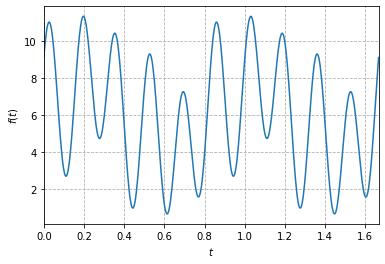

In [368]:
t = np.linspace(0,2*Tf,500)
plt.plot(t,f(t))
plt.ylabel("$f(t)$")
plt.xlabel("$t$")
plt.xlim(t.min(),t.max())
plt.grid(linestyle="--")
print("b)")
plt.show()

c) $f_0 = 1.2$ Hz
\begin{align*}
\omega_1 &= 2\pi\cdot1.2 = 2.4\pi\text{ s}^{-1},\ &A_1 &= 0,\ &B_1 &= 1.8 \\
\omega_2 &= 2\pi\cdot2.4 = 4.8\pi\text{ s}^{-1},\ &A_2 &= 0,\ &B_2 &= 0 \\
\omega_3 &= 2\pi\cdot3.6 = 7.2\pi\text{ s}^{-1},\ &A_3 &= 1.0,\ &B_3 &= 0 \\
\omega_4 &= 2\pi\cdot4.8 = 9.6\pi\text{ s}^{-1},\ &A_4 &= 0,\ &B_3 &= 0 \\
\omega_5 &= 2\pi\cdot6.0 = 12.0\pi\text{ s}^{-1},\ &A_5 &= 2.1,\ &B_3 &= 3.2
\end{align*}

d) $f(t) = \sum_{n=1} C_n e^{in\omega_0 t}$, where $C_n = \frac{A_n-iB_n}{2}$. Therefore,
\begin{align*}
C_1 &= \frac{-1.8i}{2} = -0.9i \\
C_2 &= 0 \\
C_3 &= \frac{1}{2} = 0.5 \\
C_4 &= 0 \\
C_5 &= \frac{2.1-3.2i}{2} = 1.05-1.6i
\end{align*}
Thus, the exponential Fourier series is $$f(t) = 6.0 - 0.9i e^{2\pi i 1.2 t} + \frac{e^{2\pi i 3.6 t}}{2} + (1.05-1.6i)e^{2\pi i 6.0t}$$

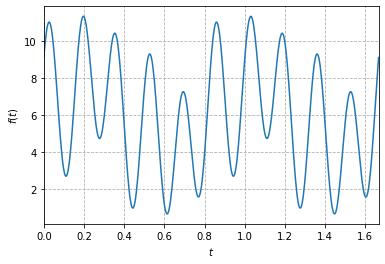

In [369]:
# exp_series = 6.0 - 0.9j*np.exp(2j*np.pi*1.2*t) + 0.5*np.exp(2j*np.pi*3.6*t) + (1.05-1.6j)*np.exp(2j*np.pi*6.0*t)
# plt.plot(t, np.sqrt(exp_series.real**2 + exp_series.imag**2))
plt.plot(t,f(t))
plt.ylabel("$f(t)$")
plt.xlabel("$t$")
plt.xlim(t.min(),t.max())
plt.grid(linestyle="--")
plt.show()

## Voltage

Frequency $f_1 = 400$ Hz, amplitude $A_1 = 2.00$ V, phase $\varphi = 0$

Frequency $f_2 = 800$ Hz, amplitude $A_2 = 1.50$ V, phase $\varphi = \pi/4$

a) The signal can be written as $2.00\sin(2\pi 400 t) + 1.50\sin(2\pi 800t + \pi/4)$

In [362]:
f1 = 400 # Hz
A1 = 2.00 # V
φ1 = 0 # rad
f2 = 800 # Hz
A2 = 1.50 # V
φ2 = π/4 # rad

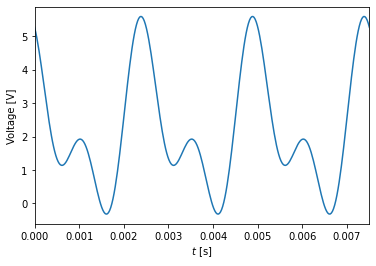

In [363]:
t = np.linspace(0,3/400,300)
y1 = A1*cos(2*π*f1*t + φ1)
y2 = A2*cos(2*π*f2*t + φ2)
plt.plot(t,2.2+y1+y2)
plt.xlabel("$t$ [s]")
plt.ylabel("Voltage [V]")
plt.xlim(t.min(),t.max())
plt.show()

b) The signal can be represented by the series/sum $2.00\sin(2\pi 400 t) + 1.50\sin(2\pi 800t)$, which has $f_1=400$ Hz, $B_1 = 2.00$, $f_2 = 800$ Hz, $B_2 = 1.50$.

c) The above series is equivalent to $-2.00i e^{2\pi i 400 t} - 1.50i e^{2\pi i 800t}$

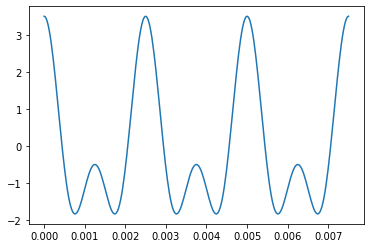

In [365]:
plt.plot(t,2*cos(2*np.pi*400*t) + 1.5*cos(2*np.pi*800*t))
# plt.plot(t,np.real(-2j*np.exp(2*np.pi*400j*t) - 1.5j*np.exp(2*np.pi*800j*t)),".")

## Step

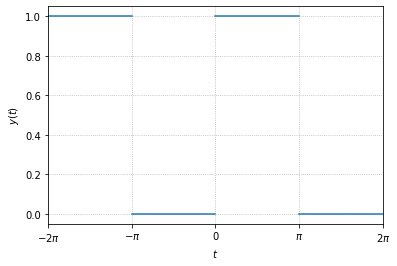

In [22]:
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")

b) As it stands, the function is neither even nor odd. If we neglect the constant offset and center the function about $y=0$, the function is odd. This implies it will be a sum of $\sin$ functions, with all coefficients associated with $\cos$ terms being $0$.

c) $A_0 = A_n = 0$, $B_0 = \frac{1}{2}$.

In [168]:
x = np.linspace(-2*np.pi,2*np.pi,628)
s = np.zeros_like(x)
b = [0.5]
for n in range(1,100):
    bn = (1/np.pi)*(1-cos(n*np.pi))/n
    b.append(bn)

d)


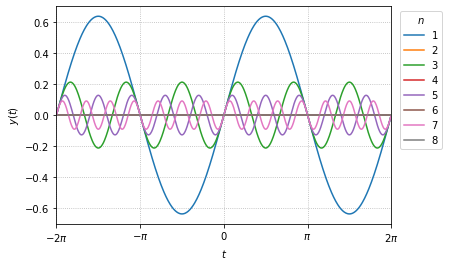

In [169]:
for n in range(1,9):
    plt.plot(x,b[n]*sin(n*x),label=n)
plt.legend(loc="upper left",bbox_to_anchor=(1.01,1),title="$n$")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("d)")
plt.show()

e)


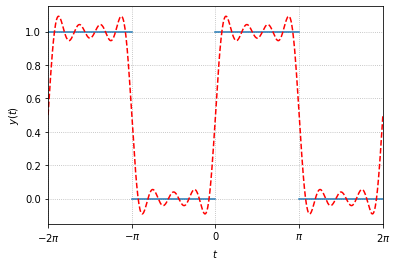

In [170]:
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
s = b[0]+np.sum([b[n]*sin(n*x) for n in range(1,9)],axis=0)
plt.plot(x,s,"r--")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("e)")
plt.show()

f) n_max = 100


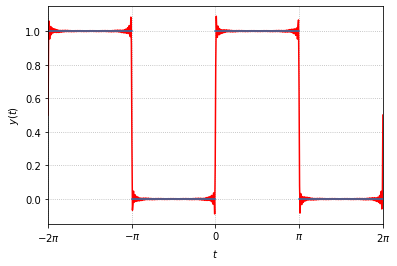

In [173]:
s = b[0]+np.sum([b[n]*sin(n*x) for n in range(1,100)],axis=0)
plt.plot(x,s,"r")
plt.plot([-2*π,-π],[1,1],color="tab:blue")
plt.plot([-π,0],[0,0],color="tab:blue")
plt.plot([0,π],[1,1],color="tab:blue")
plt.plot([π,2*π],[0,0],color="tab:blue")
plt.xticks([-2*π,-π,0,π,2*π],labels=["$-2\pi$","$-\pi$","0","$\pi$","$2\pi$"])
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.xlim(-2*π,2*π)
plt.grid(linestyle=":")
print("f) n_max = 100")
plt.show()

A theoretically infinite number of harmonics is required to faithfully reconstruct the original curve, but since we have an analytical, closed-form solution for $B_n$, the coefficients for an arbitrarily high number of harmonics can be easily calculated.

## Sampling

$$ y(t) = 0.5 + 0.6366\cos(2\pi t) + 0.5273\cos(10\pi t) − 0.7909\cos(14\pi t) $$

a) There is aliasing of the 5 and 7 Hz harmonics, but not the 1 Hz. The Nyquist limit for a frequency to be picked up by our 4.9 Hz sampling instrument is $2\cdot4.9=9.8$ Hz, and both of the higher two frequencies here exceed that.

In [221]:
y = lambda t : 0.5 + 0.6366*cos(2*π*1*t) + 0.5273*cos(2*π*5*t) - 0.7909*cos(2*π*7*t)
fs = 4.9 # Hz
N = 2048 # points
window = N/fs
t = np.linspace(0,window,N)

b)


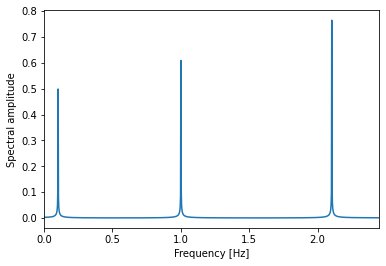

In [222]:
sp = np.fft.fft(y(t))
k = np.arange(N)
frq = k/window # two sided frequency range
frq = frq[1:N//2] # one side frequency range
sp1 = sp[1:N//2]

plt.plot(frq,np.abs(sp1)*2/N)
# plt.hlines([0.6366,0.5273,0.7909],0,8)
# plt.vlines([1,5,7],0,1,"r")
plt.xlim(0,frq.max())
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral amplitude")
print("b)")
plt.show()

The 1 Hz component appears as expected, but the 5 Hz component is aliased to $f_a = \left|5-4.9\cdot\text{NINT}\left(\frac{5}{4.9}\right)\right| = 0.1$ Hz. The 7 Hz component is aliased to $f_a = \left|7-4.9\cdot\text{NINT}\left(\frac{7}{4.9}\right)\right| = 2.1$ Hz.

c)


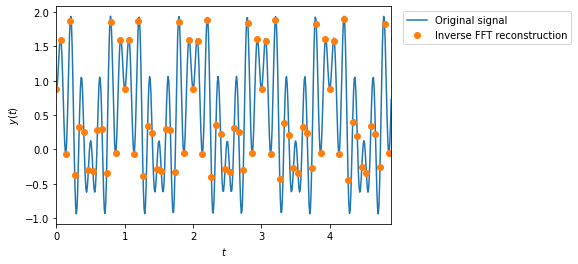

In [229]:
plt.plot(np.linspace(0,4.9,490),y(np.linspace(0,4.9,490)),"-",label="Original signal")
plt.plot(t,np.fft.ifft(sp).real,"o",label="Inverse FFT reconstruction")
plt.xlim(0,4.9)
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc="upper left",bbox_to_anchor=(1.02,1))
print("c)")
plt.show()

e) We should sample with a frequency $f_s>2\cdot(7\text{ Hz})$. For instance, let's try 15 Hz:

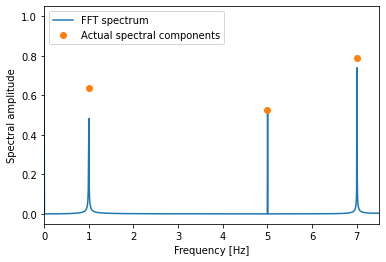

In [233]:
fs = 15 # Hz
N = 2048 # points
window = N/fs
t = np.linspace(0,window,N)
sp = np.fft.fft(y(t))
k = np.arange(N)
frq = k/window # two sided frequency range
frq = frq[:N//2] # one side frequency range
sp1 = sp[:N//2]

plt.plot(frq,np.abs(sp1)*2/N,label="FFT spectrum")
plt.plot([1,5,7],[0.6366,0.5273,0.7909],"o",label="Actual spectral components")
plt.xlim(0,frq.max())
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral amplitude")
plt.legend(loc="upper left")
plt.show()

## Aliasing

- Data sampled at 256 Hz: A signal appears at 308 Hz with amplitude 3.0 V and another peak appears at 144 Hz with amplitude 1.0 V.
- Data sampled at 512 Hz: A signal appears at 308 Hz with amplitude 3.0 V. Another signal appears at 112 Hz, with amplitude close to 1.0 V.
- Data sampled at 1,024 Hz: A signal appears 400 Hz, with amplitude close to 1.0 V. Another signal appears at 204 Hz, with amplitude close to 3.0 V.

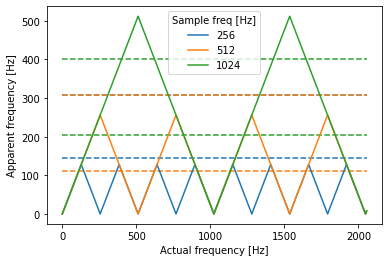

In [348]:
from scipy import optimize
fa = lambda f,fs : np.abs(f-fs*np.round(f/fs))
fspace = np.arange(0,2056,.1)
for fs in [256,512,1024]:
    plt.plot(fspace,fa(fspace,fs),label=fs)
# plt.plot(fspace,fspace)
plt.hlines([308,144],0,2056,color="tab:blue",linestyle="--")
plt.hlines([308,112],0,2056,color="tab:orange",linestyle="--")
plt.hlines([400,204],0,2056,color="tab:green",linestyle="--")
plt.xlabel("Actual frequency [Hz]")
plt.ylabel("Apparent frequency [Hz]")
plt.legend(title="Sample freq [Hz]")
plt.show()

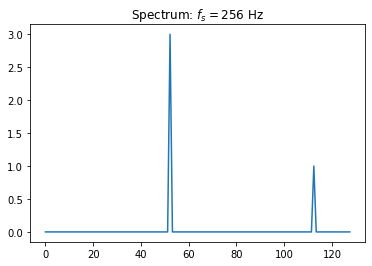

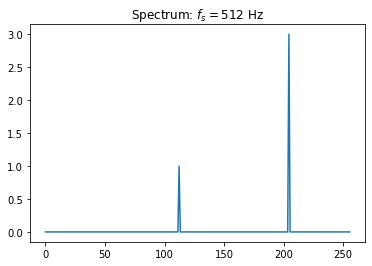

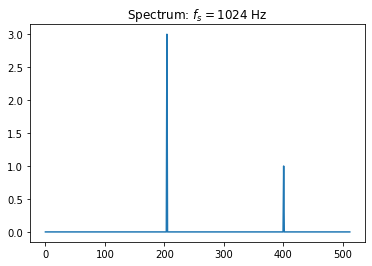

In [355]:
y = lambda t : 3*sin(2*np.pi*204*t) + 1*sin(2*np.pi*400*t)

for i,fs in enumerate([256,512,1024]):
    t = np.arange(0,1,1/fs)
    N = len(t)
    k = np.arange(N)
    frq = k/t.max()
    sp = np.fft.fft(y(t))
    plt.plot(frq[:N//2],np.abs(sp[:N//2])*2/N)    
    plt.title(f"Spectrum: $f_s={fs}$ Hz")
    plt.show()